In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

In [5]:
print(df.shape)


(344, 7)


In [6]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [7]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

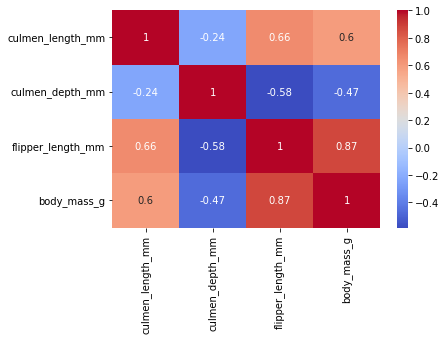

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [10]:
nan_count = df.isna().sum()
nan_count

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
nan_percentage = df.isna().sum() / df.count() * 100
nan_percentage

species              0.000000
island               0.000000
culmen_length_mm     0.584795
culmen_depth_mm      0.584795
flipper_length_mm    0.584795
body_mass_g          0.584795
sex                  2.994012
dtype: float64

In [12]:
nan_table = pd.concat([nan_count, nan_percentage], axis=1)
nan_table.columns = ['Count', 'Percentage']
nan_table

,Count,Percentage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [14]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])

In [18]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [19]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [20]:
value_counts = df['species'].value_counts().reset_index()

In [21]:
value_counts

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<AxesSubplot:xlabel='index', ylabel='species'>

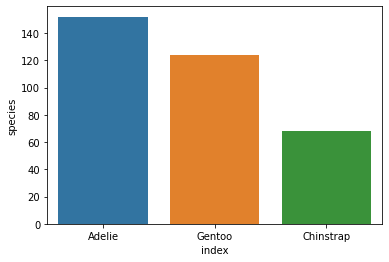

In [22]:
sns.barplot(data=value_counts, x='index', y='species')

<AxesSubplot:>

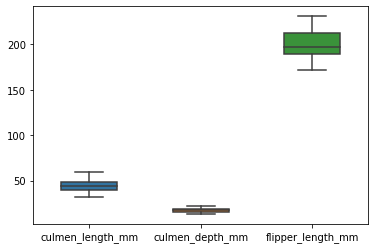

In [23]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

In [24]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [25]:
specs = df['species'].unique()
specs

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

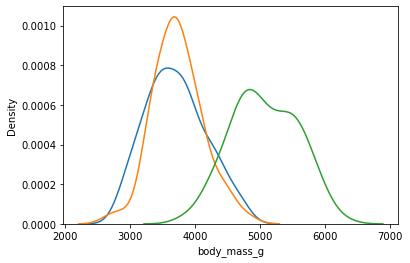

In [26]:
sns.kdeplot(df[df['species']==specs[0]]['body_mass_g'])
sns.kdeplot(df[df['species']==specs[1]]['body_mass_g'])
sns.kdeplot(df[df['species']==specs[2]]['body_mass_g'])

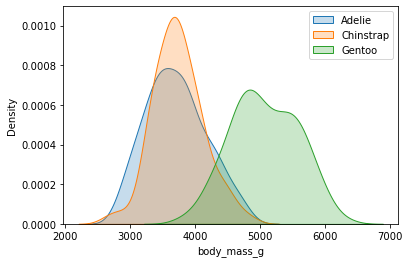

In [27]:
for spec in specs:
    sns.kdeplot(df[df['species']==spec]['body_mass_g'], shade=True, label=spec)
    plt.legend()

In [28]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

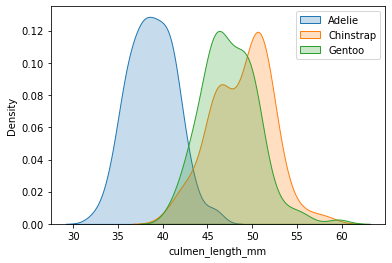

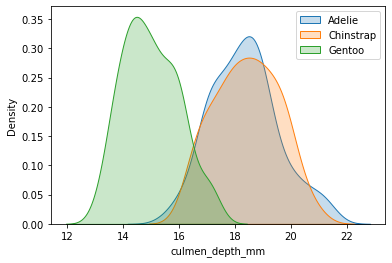

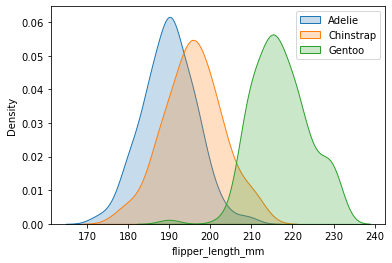

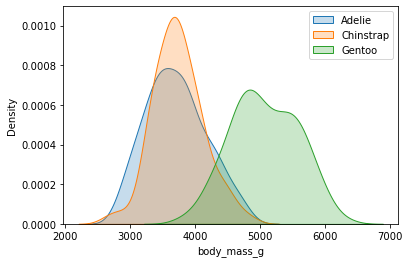

In [29]:
for cols in df.columns[2:6]:
    for spec in specs:
        sns.kdeplot(df[df['species']==spec][cols], shade=True, label=spec)
        plt.legend()
    plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


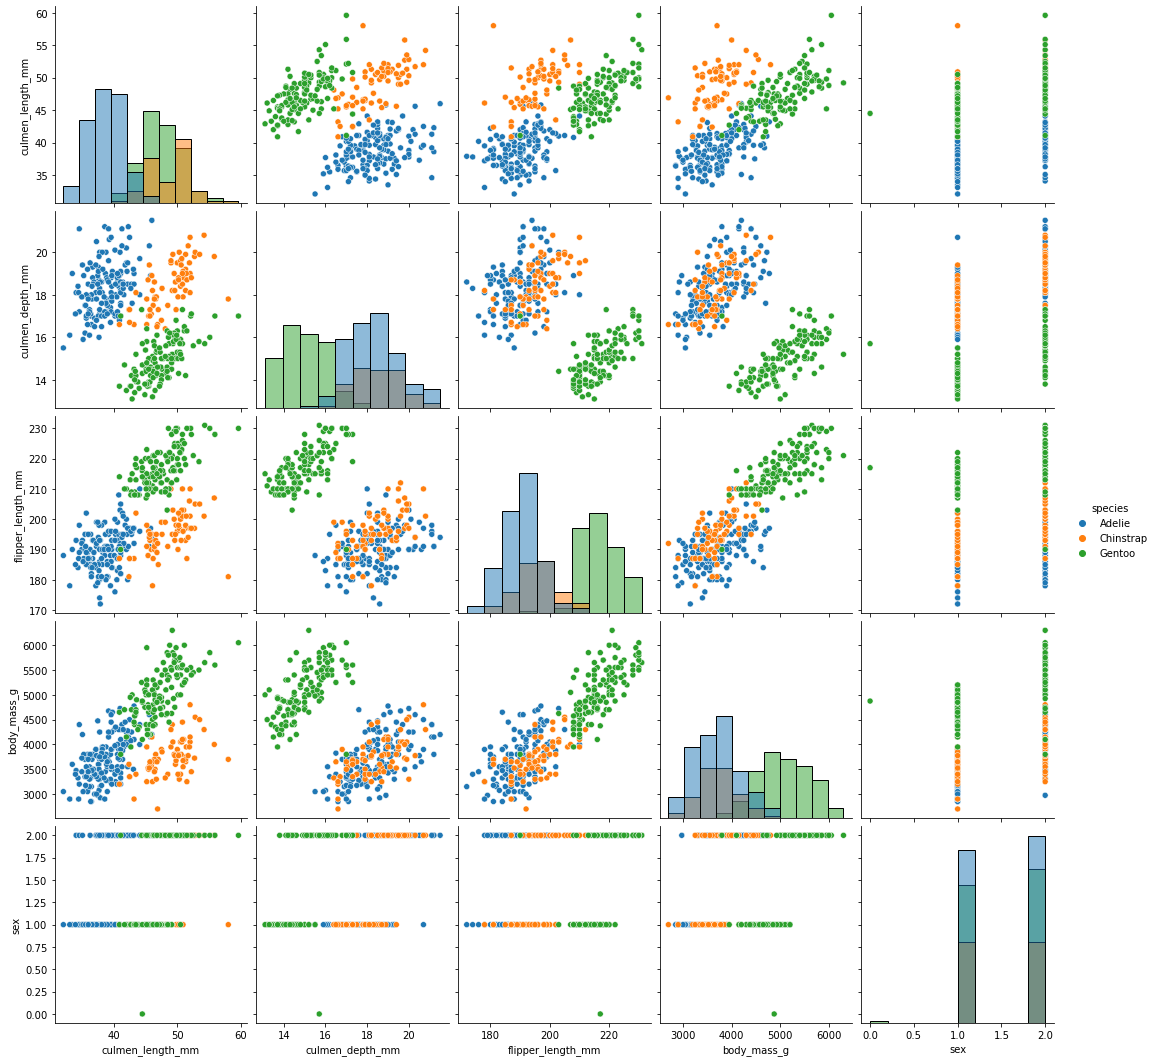

In [30]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

In [31]:
## Machine Learning 

In [32]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [33]:
island = pd.get_dummies(df[['island']], drop_first=True)
island.head()

,island_Dream,island_Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
pd.concat([df, island], axis=1).drop(['island'], axis=1)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1
3,Adelie,41.1,17.0,190.0,3800.0,2,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,1
...,...,...,...,...,...,...,...,...
339,Gentoo,41.1,17.0,190.0,3800.0,2,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,2,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0


In [35]:
df_2 = pd.concat([df, island], axis=1).drop(['island'], axis=1)
df_2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1
3,Adelie,41.1,17.0,190.0,3800.0,2,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,1


In [36]:
target, features = df_2.species, df_2.drop('species',axis=1)

In [37]:
target.shape

(344,)

In [38]:
features.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2,0,1
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
3,41.1,17.0,190.0,3800.0,2,0,1
4,36.7,19.3,193.0,3450.0,1,0,1


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features.iloc[:, :4])
features.iloc[:, :4] = scaler.transform(features.iloc[:, :4])

In [40]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,-0.883375,0.788176,-1.415471,-0.562452,2,0,1
1,-0.809845,0.127001,-1.058960,-0.499877,1,0,1
2,-0.662785,0.432159,-0.417242,-1.188208,1,0,1
3,-0.515725,-0.076437,-0.773752,-0.499877,2,0,1
4,-1.324555,1.093334,-0.559846,-0.937906,1,0,1
...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,2,0,0
340,0.532077,-1.449647,1.008800,0.814210,1,0,0
341,1.193847,-0.737612,1.507915,1.940570,2,0,0
342,0.237957,-1.195349,0.794894,1.252239,1,0,0


In [41]:
from sklearn import preprocessing
target_le = preprocessing.LabelEncoder()
target_encoded = target_le.fit_transform(target)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2)
X_train.shape

(275, 7)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
print(confusion_matrix(y_test,tree.predict(X_test)))


[[30  2  0]
 [ 1 14  0]
 [ 0  2 20]]


In [45]:
accuracy_score(y_test,tree.predict(X_test))

0.927536231884058

In [48]:


final_df = pd.concat([features, pd.Series(target_encoded, name='target')], axis=1)
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,target
0,-0.883375,0.788176,-1.415471,-0.562452,2,0,1,0
1,-0.809845,0.127001,-1.058960,-0.499877,1,0,1,0
2,-0.662785,0.432159,-0.417242,-1.188208,1,0,1,0
3,-0.515725,-0.076437,-0.773752,-0.499877,2,0,1,0
4,-1.324555,1.093334,-0.559846,-0.937906,1,0,1,0
...,...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,2,0,0,2
340,0.532077,-1.449647,1.008800,0.814210,1,0,0,2
341,1.193847,-0.737612,1.507915,1.940570,2,0,0,2
342,0.237957,-1.195349,0.794894,1.252239,1,0,0,2


In [ ]:
final_df.to_csv('penguins_scaled.csv', index=False)